In [575]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform as sp_rand
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [576]:
data_df = pd.read_csv("data/uberlyft.csv").set_index('time_stamp')
data_df.index = pd.to_datetime(data_df.index)
data_df.head()

,day,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,temp,clouds,pressure,rain,humidity,wind,Sports Occurence
time_stamp,,,,,,,,,,,,,,,,,
2018-11-26 05:26:40,Mon,1.51,Uber,Theatre District,Haymarket Square,15.0,1.0,5321c595-ddbe-4f24-b128-cf0ffb2944fb,6c84fd89-3f11-4782-9b50-97c468b19529,Black,40.64,0.93,1013.78,0.0,0.92,3.01,0.0
2018-11-26 05:26:40,Mon,2.32,Uber,North End,Back Bay,14.0,1.0,74a108a3-8d5f-4445-8f9b-dd8a0f8e5ae5,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,40.64,0.92,1013.76,0.0,0.92,3.02,0.0
2018-11-26 05:26:40,Mon,1.18,Uber,West End,South Station,10.5,1.0,ad8c44f5-9ace-4e30-aa72-9f44e2e2304b,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,40.56,0.93,1013.77,0.0,0.93,3.17,0.0
2018-11-26 05:26:40,Mon,1.18,Uber,West End,South Station,10.5,1.0,a363f700-6009-4e51-953a-38176cf958ec,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,40.56,0.93,1013.77,0.0,0.93,3.17,0.0
2018-11-26 05:26:40,Mon,2.32,Uber,North End,Back Bay,9.5,1.0,574c4736-7681-48da-be82-7e5ce23537a0,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,40.64,0.92,1013.76,0.0,0.92,3.02,0.0


In [577]:
conditions = [(data_df.index.hour >= 0) & (data_df.index.hour < 4), 
              (data_df.index.hour >= 4) & (data_df.index.hour < 8), 
              (data_df.index.hour >= 8) & (data_df.index.hour < 12), 
              (data_df.index.hour >= 12) & (data_df.index.hour < 16), 
              (data_df.index.hour >= 16) & (data_df.index.hour < 20), 
              (data_df.index.hour >= 20) & (data_df.index.hour < 24)]
choices = ['12:00-3:59 A.M.','4:00-7:59 A.M.', '8:00-11:59 A.M.', '12:00-3:59 P.M.', '4:00-7:59 P.M.', '8:00-11:59 P.M.'] 

data_df['time_range'] = np.select(conditions, choices) 

data_df.head()

,day,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,temp,clouds,pressure,rain,humidity,wind,Sports Occurence,time_range
time_stamp,,,,,,,,,,,,,,,,,,
2018-11-26 05:26:40,Mon,1.51,Uber,Theatre District,Haymarket Square,15.0,1.0,5321c595-ddbe-4f24-b128-cf0ffb2944fb,6c84fd89-3f11-4782-9b50-97c468b19529,Black,40.64,0.93,1013.78,0.0,0.92,3.01,0.0,4:00-7:59 A.M.
2018-11-26 05:26:40,Mon,2.32,Uber,North End,Back Bay,14.0,1.0,74a108a3-8d5f-4445-8f9b-dd8a0f8e5ae5,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,40.64,0.92,1013.76,0.0,0.92,3.02,0.0,4:00-7:59 A.M.
2018-11-26 05:26:40,Mon,1.18,Uber,West End,South Station,10.5,1.0,ad8c44f5-9ace-4e30-aa72-9f44e2e2304b,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,40.56,0.93,1013.77,0.0,0.93,3.17,0.0,4:00-7:59 A.M.
2018-11-26 05:26:40,Mon,1.18,Uber,West End,South Station,10.5,1.0,a363f700-6009-4e51-953a-38176cf958ec,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,40.56,0.93,1013.77,0.0,0.93,3.17,0.0,4:00-7:59 A.M.
2018-11-26 05:26:40,Mon,2.32,Uber,North End,Back Bay,9.5,1.0,574c4736-7681-48da-be82-7e5ce23537a0,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,40.64,0.92,1013.76,0.0,0.92,3.02,0.0,4:00-7:59 A.M.


In [578]:
data_df = data_df.reset_index(drop = True) # drop index
data_df = data_df.drop(['id','product_id'],axis=1) # drop id columns
data_df.head()

,day,distance,cab_type,destination,source,price,surge_multiplier,name,temp,clouds,pressure,rain,humidity,wind,Sports Occurence,time_range
0,Mon,1.51,Uber,Theatre District,Haymarket Square,15.0,1.0,Black,40.64,0.93,1013.78,0.0,0.92,3.01,0.0,4:00-7:59 A.M.
1,Mon,2.32,Uber,North End,Back Bay,14.0,1.0,UberXL,40.64,0.92,1013.76,0.0,0.92,3.02,0.0,4:00-7:59 A.M.
2,Mon,1.18,Uber,West End,South Station,10.5,1.0,WAV,40.56,0.93,1013.77,0.0,0.93,3.17,0.0,4:00-7:59 A.M.
3,Mon,1.18,Uber,West End,South Station,10.5,1.0,UberX,40.56,0.93,1013.77,0.0,0.93,3.17,0.0,4:00-7:59 A.M.
4,Mon,2.32,Uber,North End,Back Bay,9.5,1.0,WAV,40.64,0.92,1013.76,0.0,0.92,3.02,0.0,4:00-7:59 A.M.


In [579]:
data_df.isnull().any() # check if any values in column are 'NaN'

day                 False
distance            False
cab_type            False
destination         False
source              False
price               False
surge_multiplier    False
name                False
temp                False
clouds              False
pressure            False
rain                False
humidity            False
wind                False
Sports Occurence    False
time_range          False
dtype: bool

In [580]:
uberpool = data_df[data_df.name == 'UberPool']
np.average(uberpool.price)

8.757857208154311

In [581]:
# Create dummy variables for categorical features with drop_first=True

data_df = pd.get_dummies(data_df, drop_first=True)
data_df.columns

Index(['distance', 'price', 'surge_multiplier', 'temp', 'clouds', 'pressure',
       'rain', 'humidity', 'wind', 'Sports Occurence', 'day_Mon', 'day_Sat',
       'day_Sun', 'day_Thu', 'day_Tue', 'day_Wed', 'cab_type_Uber',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'name_Black SUV',
       'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft',
       'name_L

In [582]:
y = data_df.price.values # target feature
X = data_df.drop('price', axis=1).values # independent features

X_col = data_df.columns.drop('price')

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

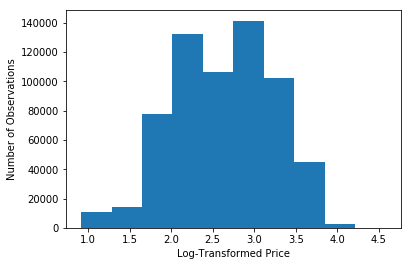

In [583]:
plt.hist(np.log(data_df.price))
plt.xlabel('Log-Transformed Price')
plt.ylabel('Number of Observations')
plt.show()

# Linear Regression

In [584]:
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X_train, y_train, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.9309262  0.93301995 0.9323043  0.93235122 0.93196414]
Average 5-Fold CV Score: 0.9321131620872958


In [585]:
reg.fit(X_train, y_train)
coeff_df = pd.DataFrame(reg.coef_, X_col, columns=['Coefficient'])  

coeff_df.head(10)

,Coefficient
distance,2.890625
surge_multiplier,17.986565
temp,0.005682
clouds,0.233181
pressure,0.023335
rain,-1.842175
humidity,0.065608
wind,0.008742
Sports Occurence,0.208295
day_Mon,-0.385889


In [586]:
y_train_pred = reg.predict(X_train)

regr_trans = TransformedTargetRegressor(regressor=LinearRegression(),
                                        func=np.log,
                                        inverse_func=np.exp)
regr_trans.fit(X_train, y_train)
log_y_train_pred = regr_trans.predict(X_train)

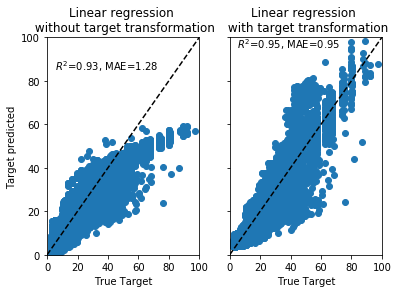

In [587]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)
ax0.set_xlim([0,100])
ax0.set_ylim([0,100])
ax1.set_xlim([0,100])
ax1.set_ylim([0,100])

ax0.scatter(y_train, y_train_pred)
ax0.plot([0, 100], [0, 100], '--k')
ax0.set_ylabel('Target predicted')
ax0.set_xlabel('True Target')
ax0.set_title('Linear regression \n without target transformation')
ax0.text(5, 85, r'$R^2$=%.2f, MAE=%.2f' % (metrics.r2_score(y_train, y_train_pred), metrics.median_absolute_error(y_train, y_train_pred)))

ax1.scatter(y_train, log_y_train_pred)
ax1.plot([0, 100], [0, 100], '--k')
ax1.set_xlabel('True Target')
ax1.set_title('Linear regression \n with target transformation')
ax1.text(5, 95, r'$R^2$=%.2f, MAE=%.2f' % (metrics.r2_score(y_train, log_y_train_pred), metrics.median_absolute_error(y_train, log_y_train_pred)))

plt.show()

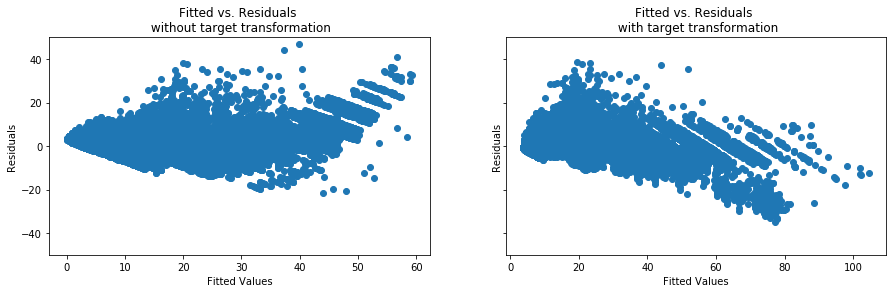

In [588]:
resid = y_train-y_train_pred
log_y_resid = y_train - log_y_train_pred

f, (ax0, ax1) = plt.subplots(1, 2, sharey=True, figsize=[15,4])

ax0.scatter(y_train_pred, resid)
ax0.set_ylabel('Residuals')
ax0.set_xlabel('Fitted Values')
ax0.set_title('Fitted vs. Residuals \n without target transformation')
ax0.set_ylim([-50, 50])

ax1.scatter(log_y_train_pred, log_y_resid)
ax1.set_ylabel('Residuals')
ax1.set_xlabel('Fitted Values')
ax1.set_title('Fitted vs. Residuals \n with target transformation')
plt.show()

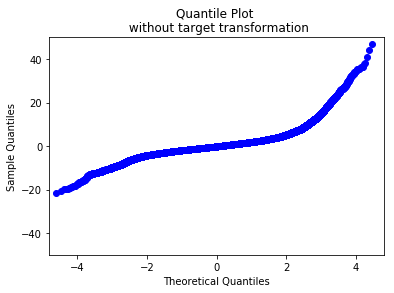

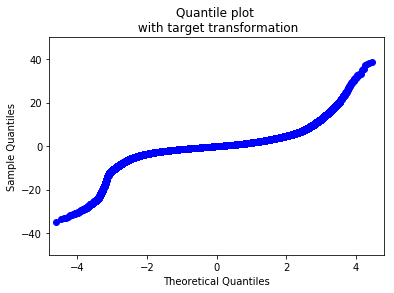

In [589]:
sm.qqplot(resid)
plt.title('Quantile Plot \n without target transformation')
plt.ylim([-50,50])
plt.show()

sm.qqplot(log_y_resid)
plt.ylim([-50,50])
plt.title('Quantile plot \n with target transformation')

plt.show()

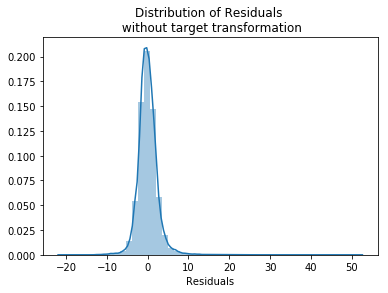

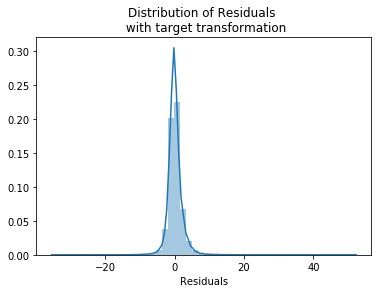

In [590]:

sns.distplot(resid)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals \n without target transformation')

plt.show()

sns.distplot(log_y_resid)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals \n with target transformation')

plt.show()

In [591]:
y_pred = reg.predict(X_test)
print("R^2: {}".format(reg.score(X_test, y_test)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Absolute Percentage Error:', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R^2: 0.9305457537947226
Mean Absolute Error: 1.7107877644976037
Mean Absolute Percentage Error: 12.951741462750837
Mean Squared Error: 6.096636894025767
Root Mean Squared Error: 2.469136872274554


In [592]:
y_pred = regr_trans.predict(X_test)

# Compute and print metrics
print('R^2 with target transform: {}'.format(regr_trans.score(X_test, y_test)))
print('Mean Absolute Error with target transform:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Absolute Percentage Error with target transform:', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print('Mean Squared Error with target transform:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error with target transform:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R^2 with target transform: 0.9451273188571628
Mean Absolute Error with target transform: 1.3991278191004632
Mean Absolute Percentage Error with target transform: 9.539325375247149
Mean Squared Error with target transform: 4.8166790456666755
Root Mean Squared Error with target transform: 2.1946933830644033


In [593]:
m = sm.OLS(np.log(y_train), X_train).fit()

In [594]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 1.599e+05
Date:                Mon, 19 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:20:09   Log-Likelihood:             2.9106e+05
No. Observations:              506636   AIC:                        -5.820e+05
Df Residuals:                  506583   BIC:                        -5.814e+05
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1752      0.000    794.600      0.000       0.175       0.176
x2             0.6644      0.002    317.844      0.000       0.660       0.668
x3             0.0002   4.74e-05      3.285      0.001    6.29e-05       0.000
x4             0.0143      0.001     17.526      0.000       0.013       0.016
x5             0.0016   3.45e-05     46.878      0.000       0.002       0.002
x6            -0.1653      0.007    -23.326      0.000      -0.179      -0.151
x7             0.0048      0.003      1.694      0.090      -0.001       0.010
x8             0.0009   8.36e-05     11.322      0.000       0.001       0.001
x9            -0.0011      0.002     -0.592      0.554      -0.005       0.003
x10           -0.0390      0.001    -44.721      0.000      -0.041      -0.037
x11           -0.0216      0.001    -25.918      0.000      -0.023      -0.020
x12           -0.0135      0.001    -16.327      0.000      -0.015      -0.012
x13           -0.0170      0.001    -19.475      0.000      -0.019      -0.015
x14           -0.0177      0.001    -16.497      0.000      -0.020      -0.016
x15           -0.0090      0.001     -6.994      0.000      -0.012      -0.006
x16            0.3053      0.023     13.101      0.000       0.260       0.351
x17           -0.0053      0.001     -5.636      0.000      -0.007      -0.003
x18            0.0018      0.014      0.131      0.896      -0.025       0.028
x19           -0.0100      0.014     -0.732      0.464      -0.037       0.017
x20           -0.0286      0.001    -30.501      0.000      -0.030      -0.027
x21            0.0108      0.014      0.795      0.427      -0.016       0.037
x22            0.0088      0.014      0.645      0.519      -0.018       0.035
x23           -0.0097      0.001    -10.169      0.000      -0.012      -0.008
x24            0.0127      0.014      0.933      0.351      -0.014       0.039
x25            0.0016      0.014      0.115      0.908      -0.025       0.028
x26            0.0194      0.001     20.748      0.000       0.018       0.021
x27           -0.0100      0.001    -10.641      0.000      -0.012      -0.008
x28           -0.0049      0.001     -5.252      0.000      -0.007      -0.003
x29           -0.0146      0.014     -1.075      0.283      -0.041       0.012
x30            0.0052      0.014      0.385      0.700      -0.021       0.032
x31           -0.0354      0.001    -37.309      0.000      -0.037      -0.034
x32            0.0101      0.014      0.742      0.458      -0.017       0.037
x33            0.0427      0.014      3.141      0.002       0.016       0.069
x34           -0.0084      0.001     -8.787      0.000      -0.010      -0.006
x35           -0.0033      0.014     -0.246      0.806      -0.030       0.023
x36            0.0247      0.014      1.818      0.069      -0.002       0.051
x3

In [595]:
influence = m.get_influence()

In [596]:
#leverage (hat values)
leverage = influence.hat_matrix_diag

In [597]:
#Cook's D values (and p-values) as tuple of arrays
cooks_d = influence.cooks_distance
np.asarray(cooks_d)

array([[1.17298992e-07, 1.31206702e-06, 4.12569926e-07, ...,
        2.79982258e-08, 1.97210612e-08, 1.93465934e-06],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [598]:
X_df = pd.DataFrame(X_train, columns=X_col)

for x in X_col:
    print('Avg ' + x + ':', np.average(X_df[x]))


Avg distance: 2.1886732289059596
Avg surge_multiplier: 1.0150907160170222
Avg temp: 39.25605866934052
Avg clouds: 0.6636029812330746
Avg pressure: 1010.2423661366346
Avg rain: 0.007435579192951153
Avg humidity: 0.7476338436273776
Avg wind: 6.966605018198471
Avg Sports Occurence: 0.011353318753503502
Avg day_Mon: 0.18351242312034677
Avg day_Sat: 0.1216830229198083
Avg day_Sun: 0.136770778231314
Avg day_Thu: 0.1493537766759567
Avg day_Tue: 0.1801628782794748
Avg day_Wed: 0.09191806346173584
Avg cab_type_Uber: 0.5186781042010438
Avg destination_Beacon Hill: 0.08267868844693231
Avg destination_Boston University: 0.08357084770920345
Avg destination_Fenway: 0.0833833363598323
Avg destination_Financial District: 0.08509659795198131
Avg destination_Haymarket Square: 0.0833201746421494
Avg destination_North End: 0.08339320537822026
Avg destination_North Station: 0.0821970803496001
Avg destination_Northeastern University: 0.08314253231116621
Avg destination_South Station: 0.08297278519489337
Avg

In [599]:
high_lev = np.where(leverage > .001)
lev = []
y = []
for ind in high_lev:
    for index in ind:
        lev.append(X_train[index])
        y.append(y_train[index])
lev_df = pd.DataFrame(lev, columns=X_col)
lev_df['price'] = y
lev_df

,distance,surge_multiplier,temp,clouds,pressure,rain,humidity,wind,Sports Occurence,day_Mon,...,name_UberPool,name_UberX,name_UberXL,name_WAV,time_range_12:00-3:59 P.M.,time_range_4:00-7:59 A.M.,time_range_4:00-7:59 P.M.,time_range_8:00-11:59 A.M.,time_range_8:00-11:59 P.M.,price
0,4.39,3.0,47.75,0.99,1000.27,0.0,0.92,3.33,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,38.5
1,4.39,3.0,47.75,0.99,1000.27,0.0,0.92,3.33,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,65.0


In [600]:
#standardized residuals
standardized_residuals = influence.resid_studentized_internal

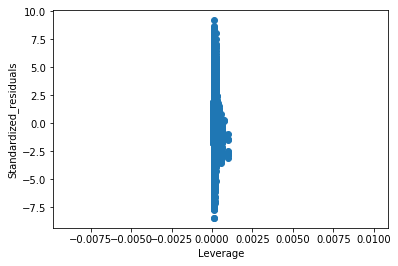

In [601]:
plt.scatter(leverage, standardized_residuals)
plt.xlabel('Leverage')
plt.ylabel('Standardized_residuals')
plt.show()

In [602]:
high_resid = np.where(standardized_residuals >= 9)
low_resid = np.where(standardized_residuals <= -9)
print(high_resid)
print(low_resid)

(array([494027], dtype=int64),)
(array([], dtype=int64),)


In [603]:
high_arr = []
high_y = []
for ind in high_resid:
    for index in ind:
        high_arr.append(X_train[index])
        high_y.append(y_train[index])
high_df = pd.DataFrame(high_arr, columns=X_col)
high_df['price'] = high_y
high_df

,distance,surge_multiplier,temp,clouds,pressure,rain,humidity,wind,Sports Occurence,day_Mon,...,name_UberPool,name_UberX,name_UberXL,name_WAV,time_range_12:00-3:59 P.M.,time_range_4:00-7:59 A.M.,time_range_4:00-7:59 P.M.,time_range_8:00-11:59 A.M.,time_range_8:00-11:59 P.M.,price
0,3.42,1.0,40.92,0.94,1028.3,0.0,0.77,4.95,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40.0


In [604]:
low_arr = []
low_y = []
for ind in low_resid:
    for index in ind:
        low_arr.append(X_train[index])
        low_y.append(y_train[index])
low_df = pd.DataFrame(low_arr, columns=X_col)
low_df['price'] = low_y
low_df

,distance,surge_multiplier,temp,clouds,pressure,rain,humidity,wind,Sports Occurence,day_Mon,...,name_UberPool,name_UberX,name_UberXL,name_WAV,time_range_12:00-3:59 P.M.,time_range_4:00-7:59 A.M.,time_range_4:00-7:59 P.M.,time_range_8:00-11:59 A.M.,time_range_8:00-11:59 P.M.,price


In [605]:
X_df = pd.DataFrame(X_train, columns=X_col)
y_df = pd.DataFrame(y_train, columns=['price'])

X_df = X_df.drop([494027],axis=0)
y_df = y_df.drop([494027],axis=0)

X_df = X_df.reset_index(drop=True)
y_df = y_df.reset_index(drop=True)

X_train = X_df.values
y_train = y_df.values

Before removing high residual low leverage instances in the training data.

In [606]:
y_pred = np.exp(m.predict(X_test))

print("R^2: {}".format(metrics.r2_score(y_test, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Absolute Percentage Error:', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.9451273675489749
Mean Absolute Error: 1.399127219726886
Mean Absolute Percentage Error: 9.539315038748022
Mean Squared Error: 4.816674771539249
Root Mean Squared Error: 2.19469240932283


After removing high residual low leverage instances in the training data.

In [607]:
new_m = sm.OLS(np.log(y_train), X_train).fit()
y_pred = np.exp(new_m.predict(X_test))

print("R^2: {}".format(metrics.r2_score(y_test, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Absolute Percentage Error:', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.9451281428128703
Mean Absolute Error: 1.3991157850233833
Mean Absolute Percentage Error: 9.539238557448307
Mean Squared Error: 4.816606719508948
Root Mean Squared Error: 2.194676905494052


# Lasso Regression

In [614]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('lasso', Lasso())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'lasso__alpha': [.01]}

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv=3).fit(X_train, np.log(y_train))

print("Tuned Linear (Lasso) Regression Parameters: {}".format(cv.best_params_)) 
print("Best score is {}".format(cv.best_score_))


Tuned Linear (Lasso) Regression Parameters: {'lasso__alpha': 0.01}
Best score is 0.929981405456057


In [609]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, np.log(y_train))

y_pred = np.exp(lasso.predict(X_test))

print("R^2: {}".format(metrics.r2_score(y_test, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Absolute Percentage Error:', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.84545307934773
Mean Absolute Error: 2.444335511446617
Mean Absolute Percentage Error: 15.832046631586927
Mean Squared Error: 13.566002221403552
Root Mean Squared Error: 3.6832054275323216


# Ridge Regression

In [617]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('ridge', Ridge())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'ridge__alpha': np.linspace(2.7,2.8,10)}

ridge_cv = GridSearchCV(pipeline, parameters, cv=3).fit(X_train, np.log(y_train))

print("Tuned Linear (Ridge) Regression Parameters: {}".format(ridge_cv.best_params_)) 
print("Best score is {}".format(ridge_cv.best_score_))

Tuned Linear (Ridge) Regression Parameters: {'ridge__alpha': 2.7777777777777777}
Best score is 0.9425700956743394


In [619]:
y_pred = np.exp(ridge_cv.predict(X_test))

print("R^2: {}".format(metrics.r2_score(y_test, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Absolute Percentage Error:', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



R^2: 0.945128866821725
Mean Absolute Error: 1.3991129708691927


MemoryError: 

In [612]:
coeff_df = pd.DataFrame(new_m.params * 100, X_col, columns=['Linear_reg_coef'])
coeff_df['Lasso_coef'] = lasso.coef_ * 100
for x in ridge.coef_:
    coeff_df['Ridge_ceof'] = x * 100


In [613]:
coeff_df

,Linear_reg_coef,Lasso_coef,Ridge_ceof
distance,17.516923,16.196835,17.516780
surge_multiplier,66.439765,0.000000,66.398116
temp,0.015531,0.118442,0.015431
clouds,1.428907,0.000000,1.428666
pressure,0.161780,0.206528,0.161633
rain,-16.517924,-0.000000,-16.395180
humidity,0.471291,-0.000000,0.456635
wind,0.094508,0.000000,0.094163
Sports Occurence,-0.111426,0.000000,-0.111043
day_Mon,-3.897565,-0.000000,-3.896904
